# 2D SQW with Qiskit

## Imports

In [31]:
import numpy as np
%matplotlib inline
from qiskit import *
from qiskit import IBMQ, Aer
from qiskit.quantum_info import Operator 
from qiskit import QuantumCircuit, execute
from qiskit.tools.visualization import plot_histogram, plot_bloch_vector
import qiskit.quantum_info as qi
from qiskit.tools.jupyter import *
from qiskit import IBMQ

In [6]:
from qiskit.quantum_info import Statevector

In [7]:
from qiskit.tools.visualization import plot_histogram

# 2D SQW

## Increment operator

In [8]:

def inc_op(n):
    circuit=QuantumCircuit(n,name='inc')
    qr=circuit.qubits
    circuit.mct([0],1)
    
    return circuit

In [9]:
qc = inc_op(2)

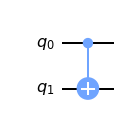

In [10]:
qc.draw('mpl')

In [11]:
inc_gate = inc_op(2).to_gate()

In [12]:
cntrl_inc = inc_gate.control(1)
cntrl_inc.definition.draw()

control: ──■──
            │  
target_0: ──■──
          ┌─┴─┐
target_1: ┤ X ├
          └───┘

## Decrement Operator

In [13]:
def dec_op(n):
    circuit=QuantumCircuit(n,name='dec')
    qr=circuit.qubits
    circuit.x(1)
    circuit.mct([1],0)
    circuit.x(1)
    return circuit

In [14]:
dec_gate = dec_op(2).to_gate()


In [15]:
qc=dec_op(2)

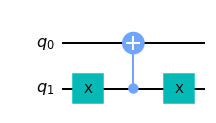

In [16]:
qc.draw('mpl')

In [17]:
cntrl_dec = dec_gate.control(1)
cntrl_dec.definition.draw()

control: ──■────■────■──
            │  ┌─┴─┐  │  
target_0: ──┼──┤ X ├──┼──
          ┌─┴─┐└─┬─┘┌─┴─┐
target_1: ┤ X ├──■──┤ X ├
          └───┘     └───┘

## Generate Walk

In [18]:
n=4

In [19]:
theta = 2*np.pi/3

In [20]:
theta

2.0943951023931953

In [21]:
def qrw(n):
    circuit=QuantumCircuit(n,name='qrw')
    circuit.append(cntrl_inc,[1,2,3])
    circuit.rx(theta,3)
    circuit.append(cntrl_dec,[1,2,3])
    
    circuit.append(cntrl_inc,[3,0,1])
    circuit.rx(theta,1)
    circuit.append(cntrl_dec,[3,0,1])
    
    circuit.x(1)
    circuit.append(cntrl_inc,[1,2,3])
    circuit.rx(theta,3)
    circuit.append(cntrl_dec,[1,2,3])
    circuit.x(1)
    
    circuit.x(3)
    circuit.append(cntrl_inc,[3,0,1])
    circuit.rx(theta,1)
    circuit.append(cntrl_dec,[3,0,1])
    circuit.x(3)
    
    return circuit

In [22]:
qrw = qrw(4).to_gate()

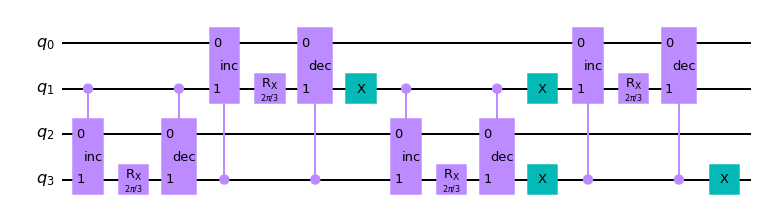

In [23]:
qrw.definition.draw('mpl')

In [24]:
def generate_walk(circuit,n,times):
    initState = Statevector.from_label('0000')
    circuit.initialize(initState)
    for i in range(times):
        circuit.append(qrw,range(n))
    circuit.measure(range(n),range(n))
    return circuit

## Generate Walk

In [25]:
n=4
times=4
circuit=QuantumCircuit(n,n)
qr=circuit.qubits
generate_walk(circuit,n,times)

## Draw Circuit

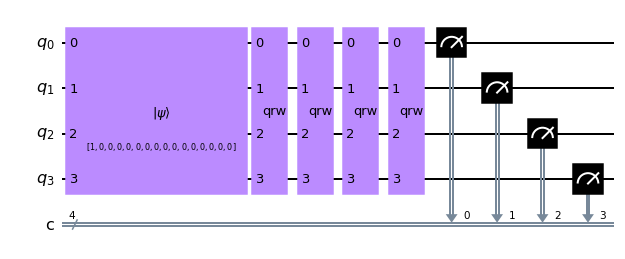

In [26]:
circuit.draw(output='mpl')

In [27]:
simulator=Aer.get_backend('qasm_simulator')

In [28]:
result=execute(circuit,backend=simulator).result()

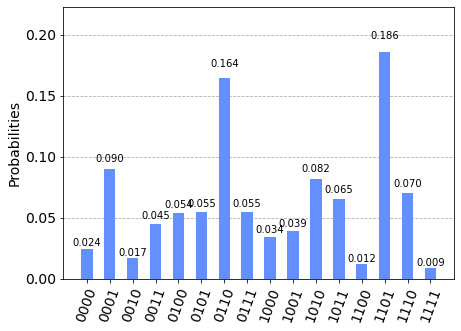

In [29]:
plot_histogram(result.get_counts(circuit))

In [64]:
IBMQ.save_account('f7d1697f0006d919c55ac275b0137bac128480d7dbb53a4e27829fdb02490a678482a150510229ac1258c8a228ba45d41619c45c28f9792b4a0d0884018df345', overwrite=True)

In [32]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Job Status: job has successfully run


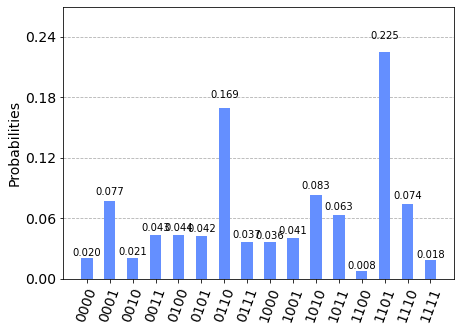

In [33]:

provider=IBMQ.get_provider('ibm-q')

qcomp= provider.get_backend('ibmq_qasm_simulator')

job=execute(circuit,backend=qcomp)

from qiskit.tools.monitor import job_monitor

job_monitor(job)

result=job.result()

plot_histogram(result.get_counts(circuit))

# Cityplot

In [73]:
def generatewalk(n):
    circuit=QuantumCircuit(n,n)
    initState = Statevector.from_label('0000')
    circuit.initialize(initState)
    circuit=QuantumCircuit(n,name='qrw')
    circuit.append(cntrl_inc,[1,2,3])
    circuit.rx(theta,3)
    circuit.append(cntrl_dec,[1,2,3])
    
    circuit.append(cntrl_inc,[3,0,1])
    circuit.rx(theta,1)
    circuit.append(cntrl_dec,[3,0,1])
    
    circuit.x(1)
    circuit.append(cntrl_inc,[1,2,3])
    circuit.rx(theta,3)
    circuit.append(cntrl_dec,[1,2,3])
    circuit.x(1)
    
    circuit.x(3)
    circuit.append(cntrl_inc,[3,0,1])
    circuit.rx(theta,1)
    circuit.append(cntrl_dec,[3,0,1])
    circuit.x(3)
    return circuit

In [74]:
qc_AB= generatewalk(4)

In [75]:
psi_AB = qi.Statevector.from_instruction(qc_AB)
psi_AB.draw('latex', prefix='|\\psi_{AB}\\rangle = ')

<IPython.core.display.Latex object>

In [76]:
rho_AB = qi.DensityMatrix.from_instruction(qc_AB)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

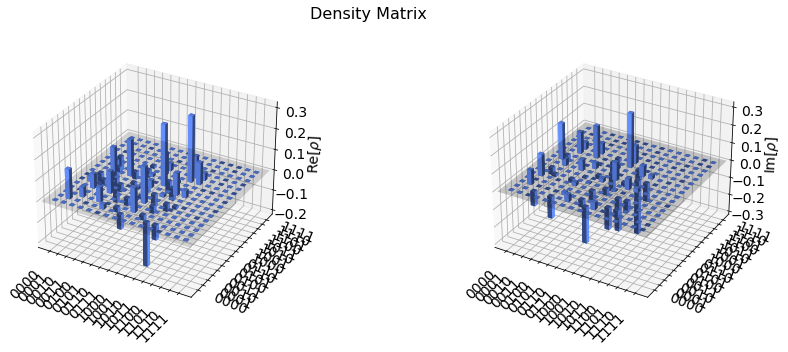

In [77]:
from qiskit.visualization import plot_state_city
plot_state_city(rho_AB.data, title='Density Matrix')